In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Categorical Features
##### 1.Sex
##### 2.Smoker
##### 3.Region

In [7]:
#data Analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

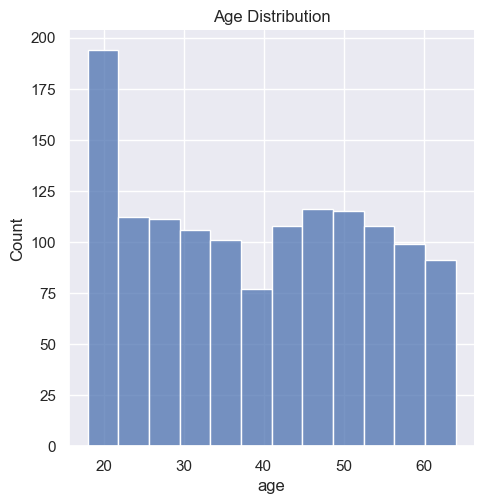

In [19]:
# distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

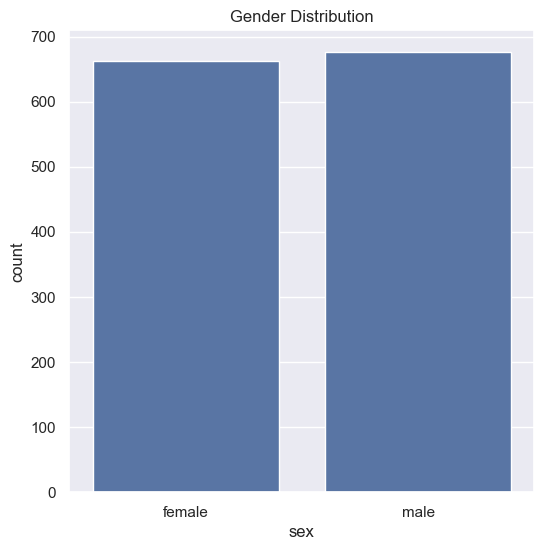

In [13]:
# gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

In [15]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [16]:
#BMI Distribution

<Figure size 600x600 with 0 Axes>

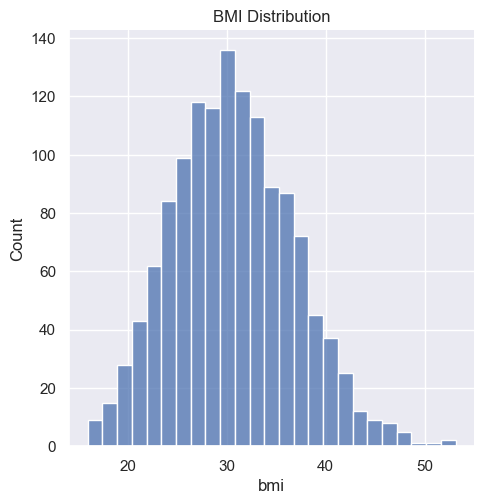

In [18]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

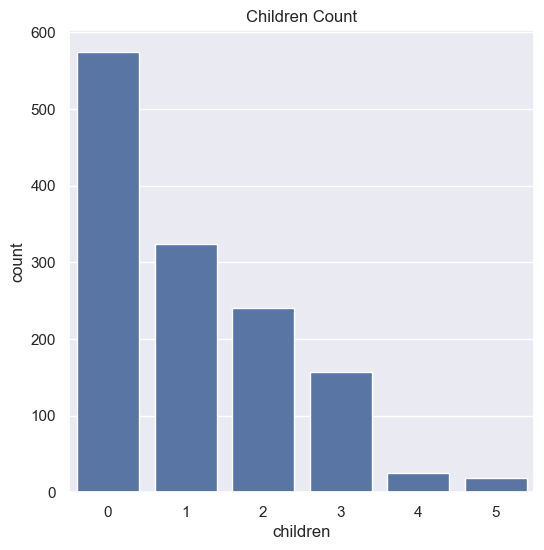

In [20]:
# Number of Children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children Count')
plt.show()

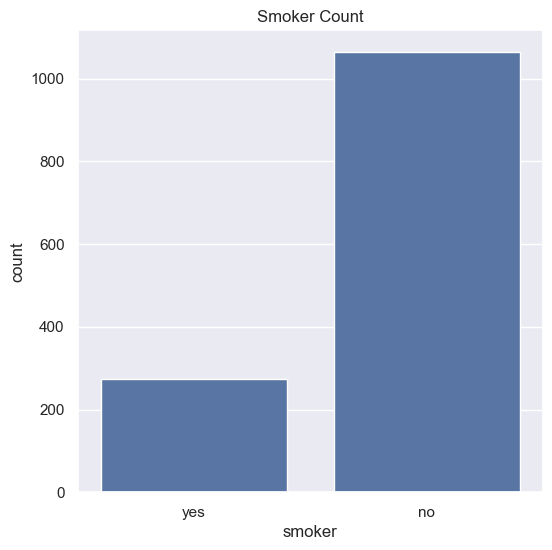

In [21]:
# smoker count
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Count')
plt.show()

In [22]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

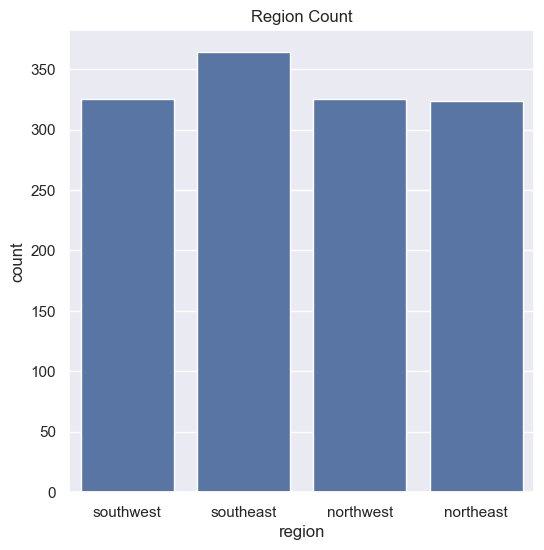

In [24]:
# Region Count
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Count')
plt.show()

In [25]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

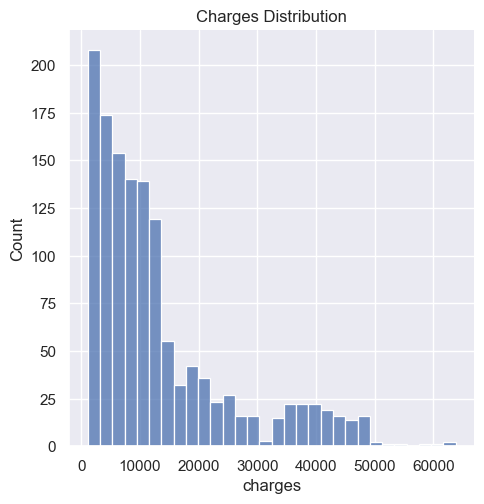

In [28]:
# Charges Distribution
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

### Encoding Categorical Data

In [29]:
# encoding gender column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\intel\AppData\Local\Temp\ipykernel_3508\2185289719.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\intel\AppData\Local\Temp\ipykernel_3508\2185289719.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\intel\AppData\Local\Temp\ipykernel_3508\2185289719.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#### Splitting Features and Target

In [31]:
X=df.drop(['charges'],axis=1)
y=df['charges']

#### Splitting data into training and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

#### Model Training

##### Linear Regression

In [36]:
linear_reg=LinearRegression()

In [37]:
linear_reg.fit(X_train,y_train)

LinearRegression()

#### Model Evaluation

In [38]:
# Training Data
train_data_prediction=linear_reg.predict(X_train)

In [40]:
# R squared Error
error_score=metrics.r2_score(train_data_prediction,y_train)
error_score

0.6693380032904603

In [41]:
# Testing Data
test_data_prediction=linear_reg.predict(X_test)

In [42]:
error_score_test=metrics.r2_score(test_data_prediction,y_test)
error_score_test

0.660665998605892

#### Building a Predictive System

In [49]:
input_data=(31,1,25.74,0,1,0)

# changing input_data tuple to numpy Array
input_data_numpy_array=np.asarray(input_data)

# reshape the array for the model to know that we are just predicting for one data point
input_data_reshaped=input_data_numpy_array.reshape(1,-1)

prediction=linear_reg.predict(input_data_reshaped)
print('Predicted Charges',prediction[0])

Predicted Charges 3760.0805764960496


C:\Users\intel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
